## PreProcess Images (Convert to Grayscale)

In [2]:
import os
from PIL import Image


def convert_and_resize_image(input_image_path, output_image_path, size=(30, 30)):
    with Image.open(input_image_path) as img:
        # Convert image to grayscale (BW)
        bw_image = img.convert('L')
        
        # Resize the image to 30x30 pixels image
        resized_image = bw_image.resize(size)
        
        # Save the resized grayscale image
        resized_image.save(output_image_path)

img_dir = 'assets/nepali-numbers'
bw_image_dir = 'assets/bw-images'
if not os.path.exists(bw_image_dir):
    os.mkdir(bw_image_dir)

for num_dir in os.scandir(img_dir):
    for img in os.scandir(f"{img_dir}/{num_dir.name}"):
        if not os.path.exists(f"{bw_image_dir}/{num_dir.name}"):
            os.mkdir(f"{bw_image_dir}/{num_dir.name}")
        convert_and_resize_image(f"{img_dir}/{num_dir.name}/{img.name}",f"{bw_image_dir}/{num_dir.name}/{img.name}")


## Create DataSet

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

bw_image_dir = 'assets/bw-images'

batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1/255, 
    validation_split=0.2  
)

train_generator = train_datagen.flow_from_directory(
    bw_image_dir,
    target_size=(30, 30),  
    batch_size=batch_size,
    class_mode='sparse',  
    subset='training',  
    color_mode='grayscale' 
)

validation_generator = train_datagen.flow_from_directory(
    bw_image_dir,
    target_size=(30, 30),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',  
    color_mode='grayscale'
)


Found 1278 images belonging to 10 classes.
Found 315 images belonging to 10 classes.


## Define the CNN Model

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    # Output Layer (10 classes: 0-9)
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


c:\Users\sandh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Train the model

In [7]:
# Train the model
from sklearn.model_selection import learning_curve

learning_rate=0.0001

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    #jatye epoch rakhxa teti nai time lagxa...
    epochs=10,  
    
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
)


c:\Users\sandh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 22s 501ms/step - accuracy: 0.1312 - loss: 2.2918 - val_accuracy: 0.2292 - val_loss: 2.2002
Epoch 2/10
 1/39 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1562 - loss: 2.1816

c:\Users\sandh\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.1562 - loss: 2.1816 - val_accuracy: 0.2431 - val_loss: 2.1877
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.3110 - loss: 2.0825 - val_accuracy: 0.5694 - val_loss: 1.3110
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5938 - loss: 1.1552 - val_accuracy: 0.5903 - val_loss: 1.3108
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6533 - loss: 1.1692 - val_accuracy: 0.7535 - val_loss: 0.8781
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6875 - loss: 0.6901 - val_accuracy: 0.7500 - val_loss: 0.8971
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7379 - loss: 0.9256 - val_accuracy: 0.8090 - val_loss: 0.7580
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8750 - loss: 0.6003 - val_accuracy: 0.8090 - val_loss: 0.7328
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8224 - loss: 0.7478 - val_accuracy: 0.7847 - val_loss: 0.77

## Evaluate the Model

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8150 - loss: 0.6696
Validation accuracy: 0.8063492178916931


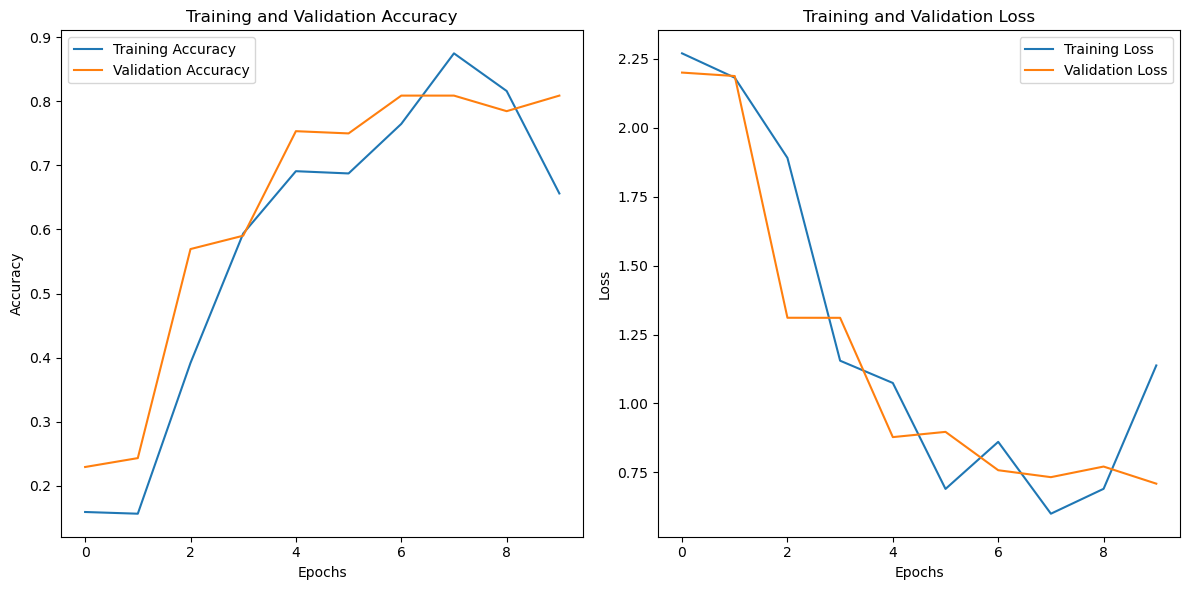

In [8]:
# Evaluate the model on the validation set
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_acc}")


# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Save Model

In [ ]:
model.save('data/digit_recognition_model.keras')


NameError: name 'model' is not defined

### predict any real image (Inference)

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
model.save('data/digit_recognition_model.keras')

model = tf.keras.models.load_model('data/digit_recognition_model.keras')

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(30, 30), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)  #
    return img_array

img_path = 'assets/zero.jpg' 
img_array = preprocess_image(img_path)

predictions = model.predict(img_array)

predicted_class = np.argmax(predictions, axis=1)[0]

# Display the image and predicted class
img = image.load_img(img_path, target_size=(30, 30), color_mode='grayscale')
plt.imshow(img, cmap='gray')
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()

# Print the prediction probabilities for each class
print("Prediction probabilities for each class: ", predictions)


NameError: name 'model' is not defined

In [12]:

def sum(x,y):
    s = x+y
    return s
add = sum(4,5)
print(add)

9
